In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
fruits = np.load("/home/piri/kuBig2025/ml_dl_python/data/fruits_300.npy")
print(fruits.shape)

(300, 100, 100)


In [26]:
fruits_2d = fruits.reshape(300, 10000)

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [28]:
print(pca.components_.shape)

(50, 10000)


In [29]:
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n / 10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
            axs[i, j].axis("off")
    plt.show()

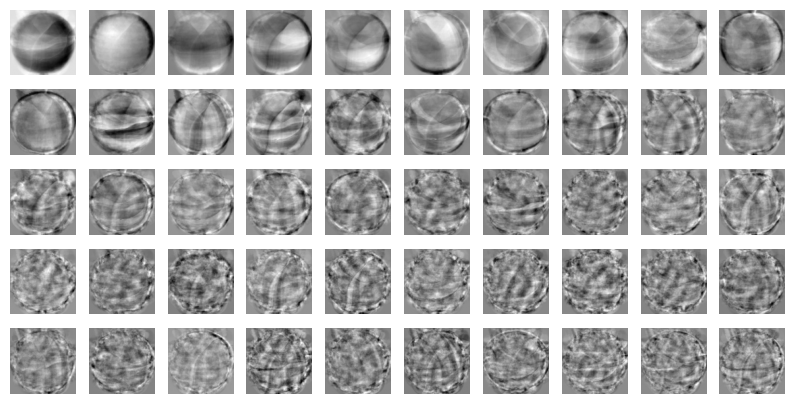

In [30]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [31]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [32]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


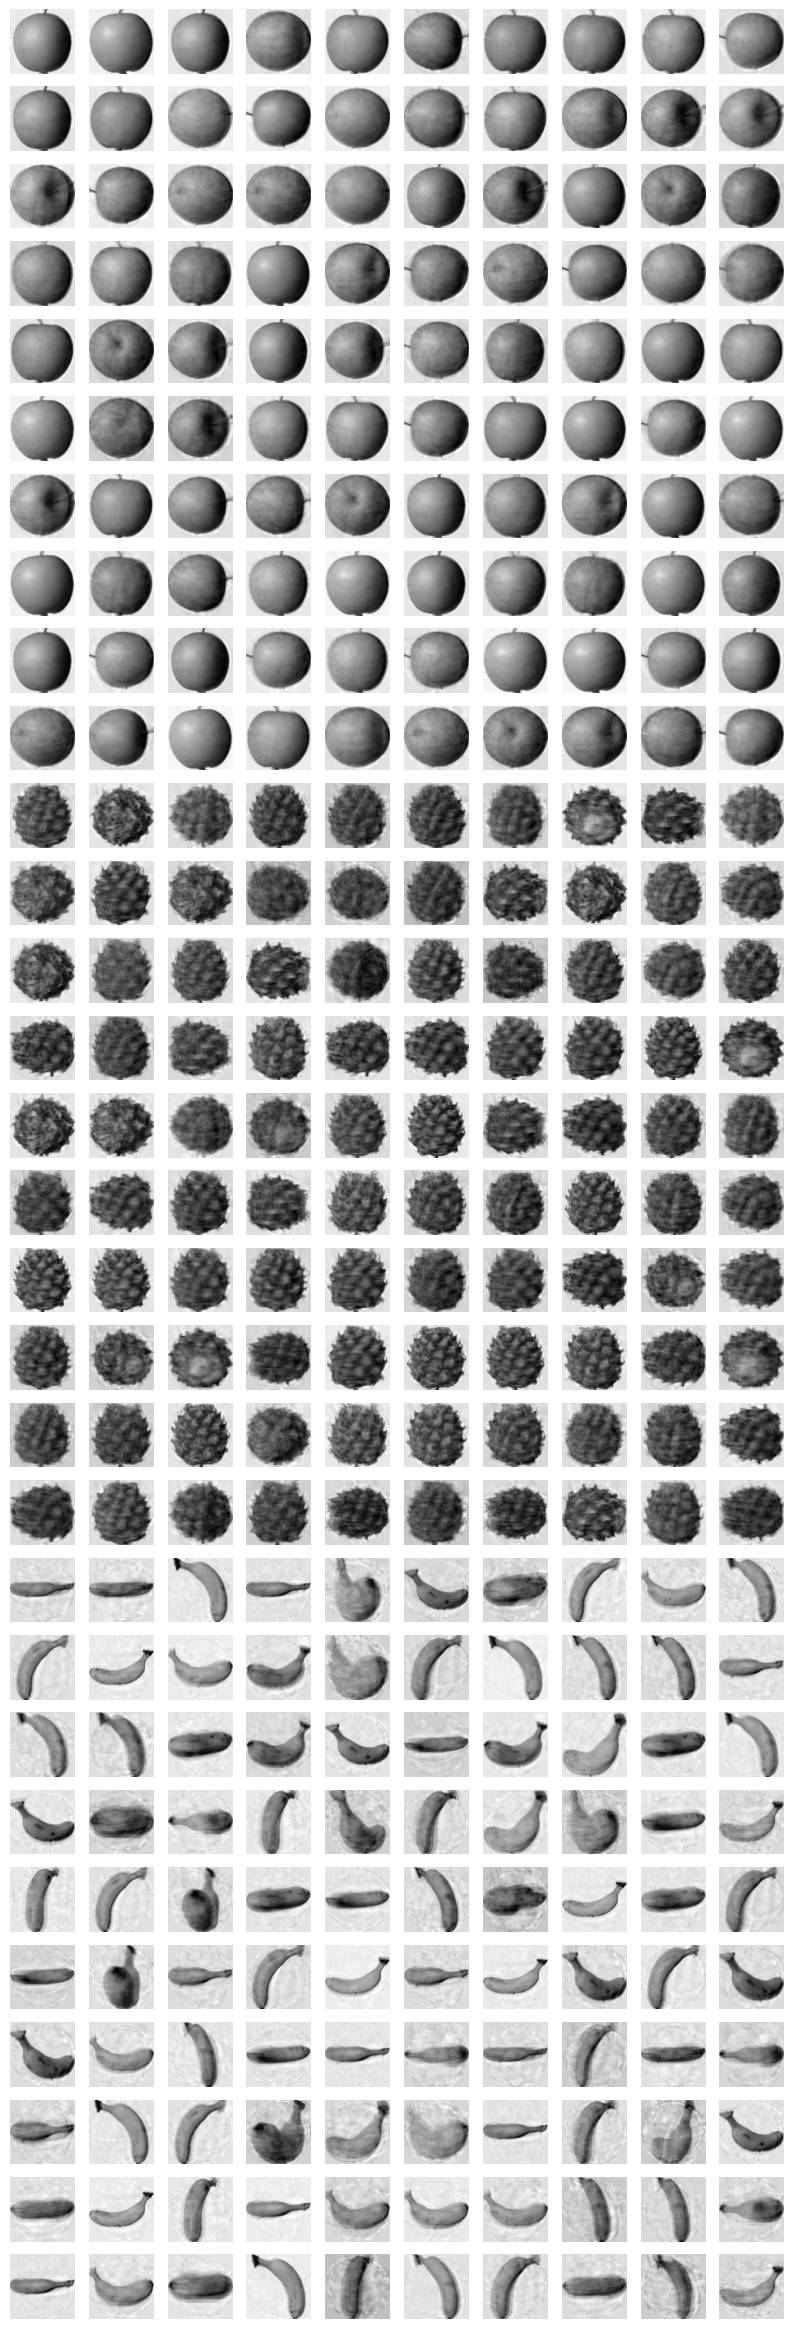

In [33]:
draw_fruits(fruits_inverse.reshape(300, 100, 100))

In [34]:
print(np.sum(pca.explained_variance_ratio_))

0.9214701682455065


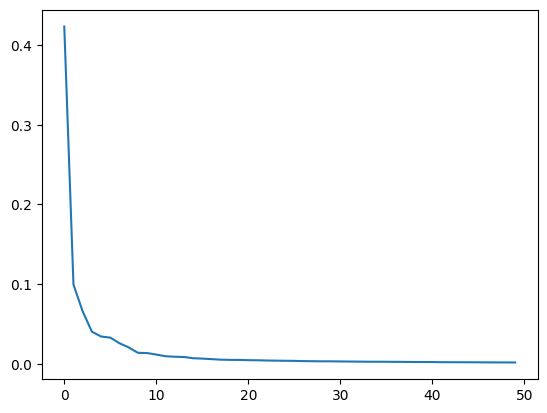

In [35]:
plt.plot(pca.explained_variance_ratio_)

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [37]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [38]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.3718879699707032


In [39]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.03051590919494629


In [40]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))


In [41]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


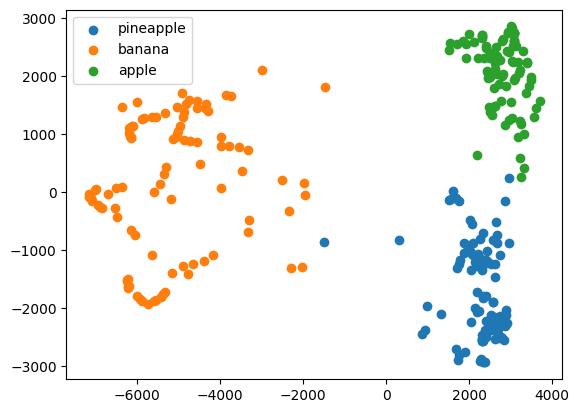

In [42]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]  # 10 개
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(["pineapple", "banana", "apple"])
plt.show()

In [45]:
# 계층적 군집화
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

cluster = AgglomerativeClustering(n_clusters=10, metric='euclidean', linkage='ward')
labels = cluster.fit(fruits_pca)

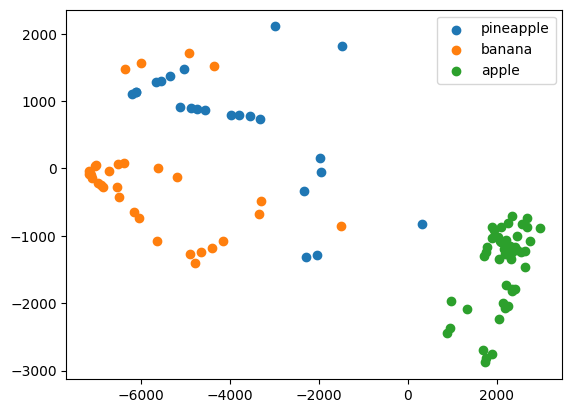

In [46]:
for label in range(0, 3):
    data = fruits_pca[labels.labels_ == label]  # 10 개
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(["pineapple", "banana", "apple"])
plt.show()

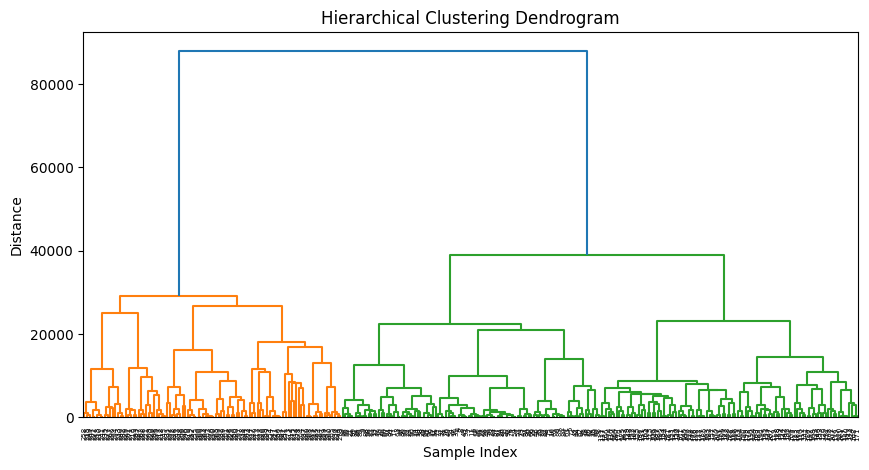

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# linkage matrix 생성 (ward 방식, metric="euclidean")
linked = linkage(fruits_pca, method="ward", metric="euclidean")

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()